<a href="https://colab.research.google.com/github/mehedi832766/DEEP/blob/main/SingleNeuralLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [21]:
len(x_train)

60000

In [22]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

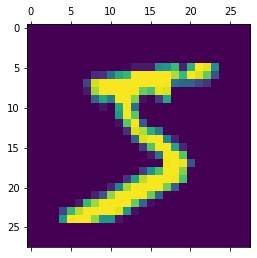

In [23]:
plt.matshow(x_train[0])

In [24]:
x_train=x_train/256
x_test=x_test/256

In [25]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [26]:
x_train_flat.shape

(60000, 784)

In [27]:
model = keras.Sequential([
       keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')           
])
# Dense all layers inter connected
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4704 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [28]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9267


[0.26767945289611816, 0.9266999959945679]

In [29]:
y_pred = model.predict(x_test_flat)
y_pred[6]

array([4.4482946e-04, 3.4774195e-05, 2.1579862e-04, 2.5976717e-02,
       9.9724042e-01, 5.5936760e-01, 8.4159374e-03, 1.7745858e-01,
       7.4943846e-01, 6.8443459e-01], dtype=float32)

In [30]:
np.argmax(y_pred[6])

4

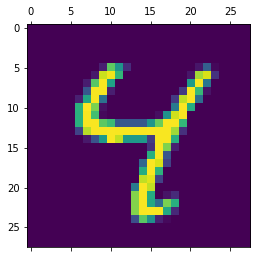

In [31]:
plt.matshow(x_test[6])

In [32]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    4,    2,    0,    8,    6,    2,    1,    0],
       [   0, 1115,    4,    1,    0,    2,    4,    2,    7,    0],
       [   3,    8,  938,   14,   12,    6,   12,    9,   26,    4],
       [   1,    0,   27,  903,    2,   44,    1,    8,   15,    9],
       [   2,    2,    5,    1,  928,    0,    5,    3,    6,   30],
       [   7,    2,    5,   17,   10,  809,   10,    4,   22,    6],
       [  10,    3,    8,    1,    8,   18,  906,    2,    2,    0],
       [   1,    5,   26,    6,   11,    1,    0,  943,    2,   33],
       [   7,    7,    8,   18,    9,   43,    9,   10,  854,    9],
       [  11,    7,    1,   10,   33,    8,    0,   20,    5,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

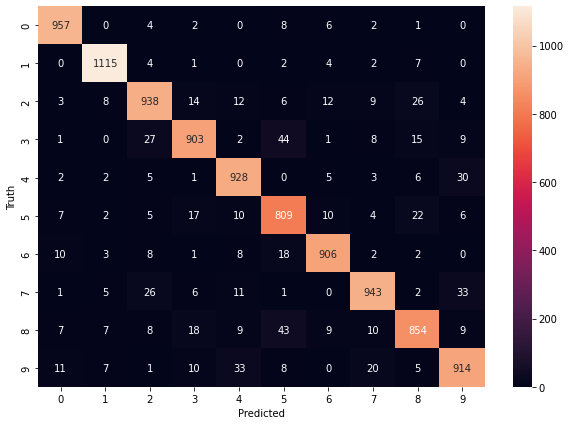

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model = keras.Sequential([
       keras.layers.Dense(100,input_shape=(784,),activation='relu'),     
       keras.layers.Dense(10,activation='sigmoid')        
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2767 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1254 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9845


In [37]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9753


[0.08329469710588455, 0.9753000140190125]

Text(69.0, 0.5, 'Truth')

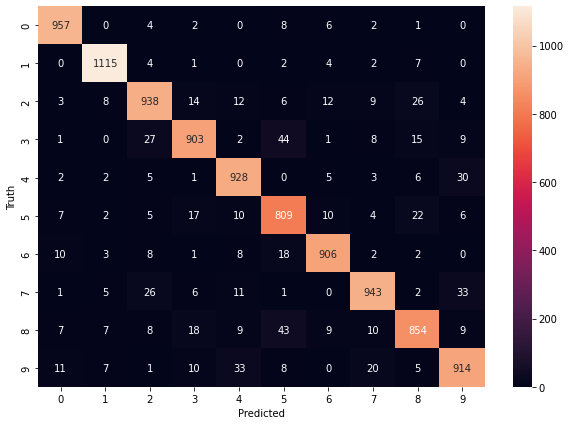

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
model = keras.Sequential([
       keras.layers.Flatten(input_shape=(28,28)),    
       keras.layers.Dense(100,activation='relu'),     
       keras.layers.Dense(10,activation='sigmoid')        
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1221 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9839
